In [1]:
import nltk
import re
import spacy
import numpy as np
from tqdm import tqdm
from nltk.corpus import stopwords  
from sklearn.model_selection import PredefinedSplit
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle

from matplotlib import rc
rc('text', usetex=True)

In [2]:
from sklearn import metrics
def create_auc(ax, resultstf,results_embed, bert_model,y_dat,filter_q,df):
    for opt in resultstf:
        
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) ) 
        probs = result["probs"]
        decision = result["decision"]


        probs_pos = [x[1] for x in probs]
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos,drop_intermediate=True)
        ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=2, alpha=0.3)
        
    ax.set_prop_cycle(None)
    
    for opt in results_embed:
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) ) 
        probs = result["probs"]
        decision = result["decision"]
        probs_pos = [x[1] for x in probs]
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos)
        ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=2)
    
    probs = bert_model["probs"]
    decision = bert_model["decisions"]
    probs_pos = [x[1] for x in probs]
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos,drop_intermediate=True)
    print("AUC:" + str(metrics.auc(fpr, tpr)))
    ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=2)
        
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend(["_nolegend_","_nolegend_","_nolegend_","_nolegend_","MN-Bayes","Logistic Regression","Gradient Boosted Trees","AutoML","GBert - Multi-Task (0.9)"])
    ax

In [3]:

## load data crowd-2
df_min2 = pd.read_csv("../Dataset/Text-Data/RP-Crowd-2-folds.csv")

## load labels and cast to int
y_dat = df_min2["label"].values
y_dat_min2 = y_dat.astype(int)

## test data filter
filter_q_min2 =  df_min2['ten_folds'] < 8 


bert_min2 = pickle.load( open( "Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_best.pickle", "rb" ) ) 

In [4]:
resultstf_min2 =["nb_abusive_min_2_tfidf.p","logreg_abusive_min_2_tfidf.p","xg_abusive_min_2_tfidf.p","automl_abusive_min_2_tfidf.p"]
results_embed_min2=["nb_abusive_min_2_embed.p","logreg_abusive_min_2_embed.p","xg_abusive_min_2_embed.p","automl_abusive_min_2_embed.p"]

In [5]:
## lets plot the results of rp-2

AUC:0.8889647462783241


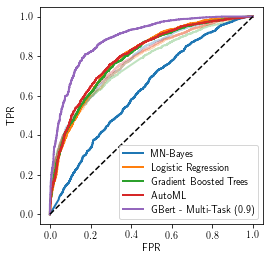

In [6]:
fig, (ax1) = plt.subplots(1 ,1, figsize=(4,4))
create_auc(ax1,resultstf_min2,results_embed_min2,bert_min2,y_dat_min2,filter_q_min2,df_min2)

In [7]:
## load data crowd-3

experiment = "abusive_min_3"

## load data
df_min3 = pd.read_csv("../Dataset/Text-Data/RP-Crowd-3-folds.csv")

## load labels and cast to int
y_dat = df_min3["label"].values
y_dat_min3 = y_dat.astype(int)

## test data filter
filter_q_min3 =  df_min3['ten_folds'] < 8 



bert_min3 =  pickle.load( open( "Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_best.pickle", "rb" ) ) 




In [8]:
resultstf_min3 =["nb_abusive_min_3_tfidf.p","logreg_abusive_min_3_tfidf.p","xg_abusive_min_3_tfidf.p","automl_abusive_min_3_tfidf.p"]
results_embed_min3=["nb_abusive_min_3_embed.p","logreg_abusive_min_3_embed.p","xg_abusive_min_3_embed.p","automl_abusive_min_3_embed.p"]

AUC:0.913570168808264


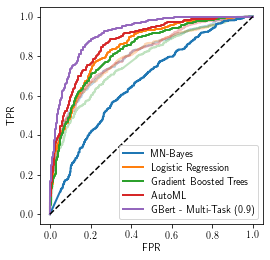

In [9]:
fig, (ax1) = plt.subplots(1 ,1, figsize=(4,4))
create_auc(ax1,resultstf_min3,results_embed_min3,bert_min3,y_dat_min3,filter_q_min3,df_min3)

In [10]:
## first we plot moderators

experiment = "abusive_moderators"

## load data
df_mod = pd.read_csv("../Dataset/Text-Data/RP-Mod-folds.csv")

## load labels and cast to int
y_dat = df_mod["label"].values
y_dat_mod = y_dat.astype(int)

## test data filter
filter_q_mod =  df_mod['ten_folds'] < 8 

bert_mod = pickle.load( open( "Language Model-Results/gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_best.pickle", "rb" ) ) 
 

In [11]:
resultstf_moderators =["nb_abusive_mod_tfidf.p","logreg_abusive_mod_tfidf.p","xg_abusive_mod_tfidf.p","automl_abusive_mod_tfidf.p"]
results_embed_moderators=["nb_abusive_mod_embed.p","logreg_abusive_mod_embed.p","xg_abusive_mod_embed.p","automl_abusive_mod_embed.p"]

AUC:0.7911819139420474


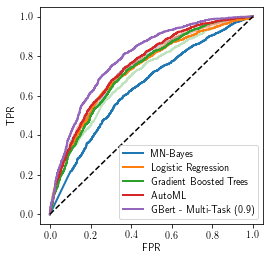

In [12]:
fig, (ax1) = plt.subplots(1 ,1, figsize=(4,4))
create_auc(ax1,resultstf_moderators,results_embed_moderators,bert_mod,y_dat_mod,filter_q_mod,df_mod)

In [13]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

def create_precision_recall_curve(ax, resultstf,results_embed, bert_model,y_dat,filter_q):
    for opt in resultstf:
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) ) 
        probs = result["probs"]
        decision = result["decision"]

        #print(sklearn.metrics.accuracy_score(y_dat[-filter_q], decision))
        #print(sklearn.metrics.f1_score(y_dat[-filter_q], decision))

        probs_pos = [x[1] for x in probs]
        lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(y_dat[-filter_q], probs_pos)
        ax.plot(lr_recall, lr_precision, label='Bla', alpha=0.3)
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        # show the legend
    
    ## reset color cycle
    ax.set_prop_cycle(None)
    
    for opt in results_embed:
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) )  
        probs = result["probs"]
        decision = result["decision"]

        #print(sklearn.metrics.accuracy_score(y_dat[-filter_q], decision))
        #print(sklearn.metrics.f1_score(y_dat[-filter_q], decision))

        probs_pos = [x[1] for x in probs]
        lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(y_dat[-filter_q], probs_pos)
        ax.plot(lr_recall, lr_precision, label='Bla')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        # show the legend
        
    probs = bert_model["probs"]
    decision = bert_model["decisions"]
    probs_pos = [x[1] for x in probs]
    lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(y_dat[-filter_q], probs_pos)
    ax.plot(lr_recall, lr_precision, label='Bla')
    
    ax.legend(["_nolegend_","_nolegend_","_nolegend_","_nolegend_","MN-Bayes","Logistic Regression","Random Forest","AutoML","GBert - Multi-Task (0.9)"])


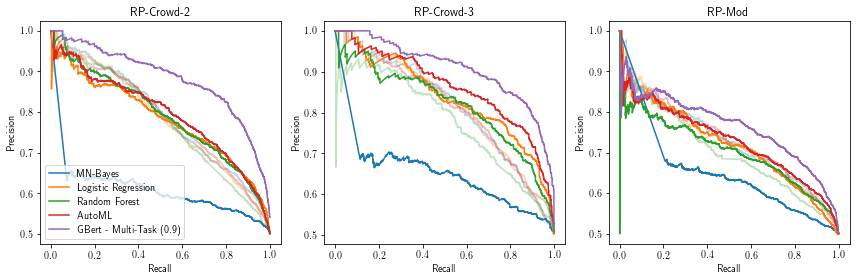

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(1 ,3, figsize=(12,4))

create_precision_recall_curve(ax1,resultstf_min2,results_embed_min2,bert_min2,y_dat_min2,filter_q_min2)
ax1.set_title("RP-Crowd-2")

create_precision_recall_curve(ax2,resultstf_min3,results_embed_min3,bert_min3,y_dat_min3,filter_q_min3)
ax2.set_title("RP-Crowd-3")
ax2.get_legend().remove()

create_precision_recall_curve(ax3,resultstf_moderators,results_embed_moderators,bert_mod,y_dat_mod,filter_q_mod)
ax3.set_title("RP-Mod")
ax3.get_legend().remove()

fig.tight_layout()


In [15]:
from sklearn import metrics
def create_auc(ax, resultstf,results_embed, bert_model,y_dat,filter_q,df):
    for opt in resultstf:
        
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) ) 
        probs = result["probs"]
        decision = result["decision"]


        probs_pos = [x[1] for x in probs]
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos,drop_intermediate=True)
        ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=2, alpha=0.3)
        
    ax.set_prop_cycle(None)
    
    for opt in results_embed:
        result =pickle.load( open( "Best-Baseline-Results/" + opt, "rb" ) )  
        probs = result["probs"]
        decision = result["decision"]
        probs_pos = [x[1] for x in probs]
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos)
        ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=2)
    
    probs = bert_model["probs"]
    decision = bert_model["decisions"]
    probs_pos = [x[1] for x in probs]
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(df[-filter_q]["label"].values, probs_pos,drop_intermediate=True)
    
    #print("AUC:" + str(metrics.auc(fpr, tpr)))
    ax.plot(fpr, tpr,linestyle='-', label='AutoSklearn',linewidth=1.5)
        
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend(["_nolegend_","_nolegend_","_nolegend_","_nolegend_","MN-Bayes","Log. Regression","Gradient Boosted Trees","AutoML","\\texttt{GBERT$_{Base}$} ($\\alpha$ = 0.9)"])
    ax

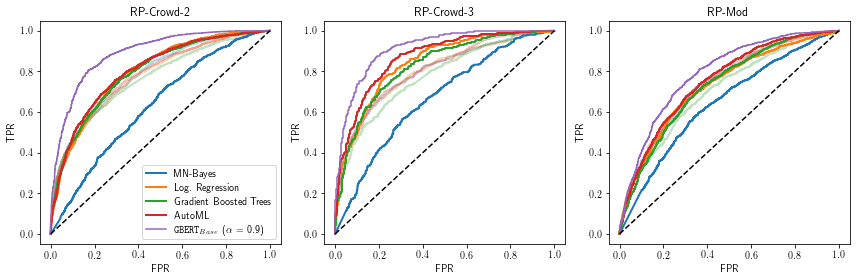

In [16]:
fig, (ax1, ax2,ax3) = plt.subplots(1 ,3, figsize=(12,4))
create_auc(ax1,resultstf_min2,results_embed_min2,bert_min2,y_dat_min2,filter_q_min2,df_min2)
ax1.set_title("RP-Crowd-2")
create_auc(ax2,resultstf_min3,results_embed_min3,bert_min3,y_dat_min3,filter_q_min3,df_min3)
ax2.set_title("RP-Crowd-3")
ax2.get_legend().remove()
create_auc(ax3,resultstf_moderators,results_embed_moderators,bert_mod,y_dat_mod,filter_q_mod,df_mod)
ax3.set_title("RP-Mod")
ax3.get_legend().remove()
#create_auc(ax2)

fig.tight_layout()
#plt.show()
#plt.savefig("auc.pdf", bbox_inches='tight')

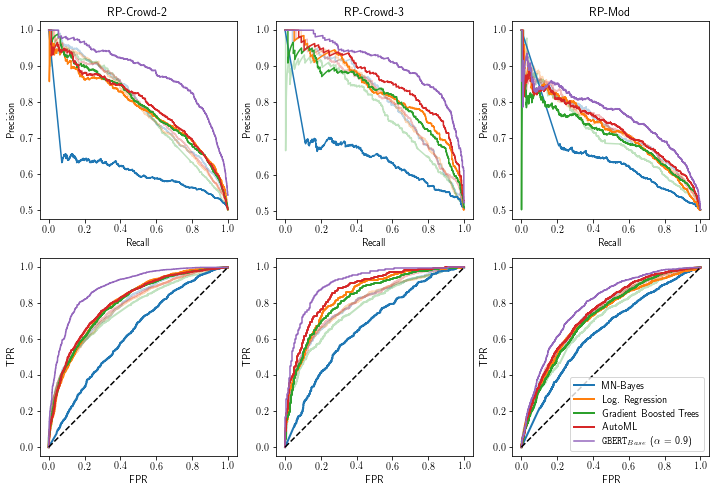

In [17]:
## now we create a large figure

fig, ((ax1, ax2, ax3) , (ax4, ax5 ,ax6)) = plt.subplots(2 ,3, figsize=(12,8))
create_precision_recall_curve(ax1,resultstf_min2,results_embed_min2,bert_min2,y_dat_min2,filter_q_min2)
ax1.set_title("RP-Crowd-2")
ax1.get_legend().remove()

create_precision_recall_curve(ax2,resultstf_min3,results_embed_min3,bert_min3,y_dat_min3,filter_q_min3)
ax2.set_title("RP-Crowd-3")
ax2.get_legend().remove()

create_precision_recall_curve(ax3,resultstf_moderators,results_embed_moderators,bert_mod,y_dat_mod,filter_q_mod)
ax3.set_title("RP-Mod")
ax3.get_legend().remove()

create_auc(ax4,resultstf_min2,results_embed_min2,bert_min2,y_dat_min2,filter_q_min2,df_min2)
ax4.get_legend().remove()

create_auc(ax5,resultstf_min3,results_embed_min3,bert_min3,y_dat_min3,filter_q_min3,df_min3)

ax5.get_legend().remove()
create_auc(ax6,resultstf_moderators,results_embed_moderators,bert_mod,y_dat_mod,filter_q_mod,df_mod)

plt.savefig("Figures/auc.pdf", bbox_inches='tight')

In [18]:
import sklearn.metrics
metrics.f1_score(df_min3[-filter_q_min3]["label"].values,bert_min3["decisions"])
metrics.fbeta_score(df_min3[-filter_q_min3]["label"].values,bert_min3["decisions"],2)

0.8587127158555732

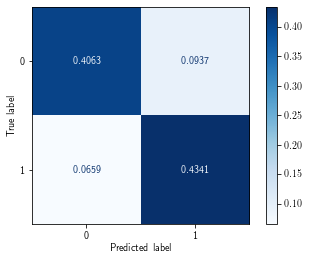

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
mat = confusion_matrix(df_min3[-filter_q_min3]["label"].values,bert_min3["decisions"])
mat = mat/len(bert_min3["decisions"])
disp = sklearn.metrics.ConfusionMatrixDisplay(mat)
disp.plot(values_format=".4f",cmap=plt.cm.Blues)      

[[0.41589862 0.08410138]
 [0.10195853 0.39804147]]


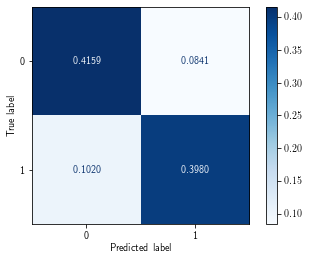

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
mat = confusion_matrix(df_min2[-filter_q_min2]["label"].values,bert_min2["decisions"])
mat = mat/len(bert_min2["decisions"])
print(mat)
disp = sklearn.metrics.ConfusionMatrixDisplay(mat)
disp.plot(values_format=".4f",cmap=plt.cm.Blues)     

[[0.36134454 0.13865546]
 [0.1407563  0.3592437 ]]


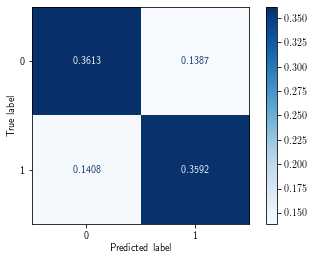

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
mat = confusion_matrix(df_mod[-filter_q_mod]["label"].values,bert_mod["decisions"])
mat = mat/len(bert_mod["decisions"])
print(mat)
disp = sklearn.metrics.ConfusionMatrixDisplay(mat)
disp.plot(values_format=".4f",cmap=plt.cm.Blues)     